In [1]:
# import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

# 2 The Factors

Use the data found in ‘factor pricing data.xlsx’.
• FACTORS: Monthly excess return data for the overall equity market, ˜r
MKT. The sheet also
contains data on five additional factors. All factor data is already provided as excess returns.
2



In [2]:
factors = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/factor_pricing_data.xlsx',sheet_name=1,index_col='Date',parse_dates=['Date'])
factors

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0182,0.0175,-0.0169,0.0171,0.0755
1980-02-29,-0.0122,-0.0158,0.0061,0.0007,0.0270,0.0788
1980-03-31,-0.1290,-0.0692,-0.0101,0.0145,-0.0116,-0.0955
1980-04-30,0.0397,0.0105,0.0108,-0.0206,0.0027,-0.0043
1980-05-31,0.0526,0.0210,0.0038,0.0032,-0.0032,-0.0112
...,...,...,...,...,...,...
2021-05-31,0.0029,0.0119,0.0704,0.0234,0.0310,0.0088
2021-06-30,0.0275,-0.0025,-0.0776,-0.0214,-0.0099,0.0224
2021-07-31,0.0127,-0.0456,-0.0175,0.0536,-0.0055,-0.0229


## 1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics.

• mean

• volatility

• Sharpe

In [3]:
stats = pd.DataFrame()
stats['Mean'] = factors.mean() *12
stats['Vol'] = factors.std() *math.sqrt(12)
stats['Sharpe'] = stats['Mean'] / stats['Vol']
stats

,Mean,Vol,Sharpe
MKT,0.087296,0.155369,0.561860
SMB,0.013454,0.100968,0.133249
HML,0.022893,0.106119,0.215733
RMW,0.042479,0.082724,0.513502
CMA,0.029578,0.068561,0.431417
UMD,0.064606,0.155688,0.414970


## 2. Based on the factor statistics above, answer the following
### (a) Does each factor have a positive risk premium (positive expected excess return)?


Yes, at least when considering the full time period.

### (b) How have the factors performed since the time of the case, (2015-present)?

In [4]:
stats = pd.DataFrame()
stats['Mean 2015-'] = factors.loc['2015':].mean() *12
stats['Vol 2015-'] = factors.loc['2015':].std() *math.sqrt(12)
stats['Sharpe 2015-'] = stats['Mean 2015-'] / stats['Vol 2015-']
stats

,Mean 2015-,Vol 2015-,Sharpe 2015-
MKT,0.135985,0.151894,0.895265
SMB,-0.000741,0.100365,-0.007380
HML,-0.053511,0.120598,-0.443716
RMW,0.024044,0.062164,0.386792
CMA,-0.025185,0.061172,-0.411709
UMD,0.015022,0.142403,0.105491


The market still remains strong. RMW and UMD are slightly positive. SMB, HML, and CMA now have negative expected excess returns.

## 3. Report the correlation matrix across the six factors



### (a) Does the construction method succeed in keeping correlations small?

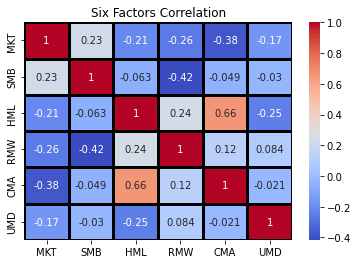

In [5]:
overall_correlation = factors.corr()
overall_correlation
sns.heatmap(factors.corr(),annot=True,cmap='coolwarm',linewidths=3,linecolor='black')
plt.title('Six Factors Correlation')
plt.show()


Most of the correlations are relatively small. The main exception is the correlation between HML and CMA.

### (b) Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

It does have a relatively high correlation with CMA (0.66). This does suggest some redudancy. 

## 4. Report the tangency weights for a portfolio of these 6 factors.

### (a) Which factors seem most important? And Least?

In [6]:
sigma = factors.cov()
sigma_inv = np.linalg.inv(sigma)
mu_tilde = factors.mean()
ones = np.ones(sigma_inv.shape[0])
w_t = sigma_inv @ mu_tilde / (ones @ sigma_inv @ mu_tilde)
w_t = pd.DataFrame(w_t, index = sigma.index,columns=['w_t'])
w_t

,w_t
MKT,0.207840
SMB,0.076570
HML,-0.054888
RMW,0.287032
CMA,0.387464
UMD,0.095982


The market, RMW, CMA have the highest magntidues. HML has the lowest magnitude.

### (b) Are the factors with low mean returns still useful?

Yes, CMA has one of the lower mean returns but the highest allocation.



### (c) Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD.
Which factors get high/low tangency weights now?

In [7]:
factors_4c = factors.copy()
factors_4c.drop('RMW',axis=1,inplace=True)
factors_4c.drop('CMA',axis=1,inplace=True)
factors_4c

,MKT,SMB,HML,UMD
Date,,,,
1980-01-31,0.0551,0.0182,0.0175,0.0755
1980-02-29,-0.0122,-0.0158,0.0061,0.0788
1980-03-31,-0.1290,-0.0692,-0.0101,-0.0955
1980-04-30,0.0397,0.0105,0.0108,-0.0043
1980-05-31,0.0526,0.0210,0.0038,-0.0112
...,...,...,...,...
2021-05-31,0.0029,0.0119,0.0704,0.0088
2021-06-30,0.0275,-0.0025,-0.0776,0.0224
2021-07-31,0.0127,-0.0456,-0.0175,-0.0229


In [8]:
sigma_4c = factors_4c.cov()
sigma_inv_4c = np.linalg.inv(sigma_4c)
mu_tilde_4c = factors_4c.mean()
ones = np.ones(sigma_inv_4c.shape[0])
w_t_4c = sigma_inv_4c @ mu_tilde_4c / (ones @ sigma_inv_4c @ mu_tilde_4c)
w_t_4c = pd.DataFrame(w_t_4c, index = sigma_4c.index,columns=['w_t_4c'])
w_t_4c

,w_t_4c
MKT,0.345463
SMB,0.004106
HML,0.353157
UMD,0.297273


UMD and HML have a much higher weight now. SMB remains low.  MKT remains high.

### What do you conclude about the importance or unimportance of these styles?


We can conclude that the importance of these styles is very much based on correlation between the factors.



# 3 Testing Modern LPMs

Consider the following factor models:
    
• CAPM: MKT
    
• Fama-French 3F: MKT, SMB, HML
    
• Fama-French 5F: MKT, SMB, HML, RMW, CMA
    
• AQR: MKT, HML, RMW, UMD

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional
regression tests.)

### (a) For each regression, report the estimated α and r-squared.

In [9]:
AQR = pd.DataFrame(columns=['Alpha','Rsquared'])
portfolios = pd.read_excel('factor_pricing_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
for stock in portfolios.columns:
    X = sm.add_constant(factors[['MKT','HML','RMW','UMD']])
    Y = portfolios[stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
#     print(stock)
#     print(estimation.params)
    AQR.loc[stock,'Alpha'] = estimation.params[0] * 12 # annualized
    AQR.loc[stock,'Rsquared'] = estimation.rsquared
    
    
#     print(estimation.params)
    
AQR
# portfolios

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Alpha,Rsquared
Agric,0.006173,0.333989
Food,0.011492,0.481227
Soda,0.019708,0.314837
Beer,0.023215,0.427681
Smoke,0.039668,0.266289
Toys,-0.015532,0.504204
Fun,0.035061,0.609556
Books,-0.027048,0.687783
Hshld,-0.000708,0.57967
Clths,0.003485,0.616345


### (b) Calculate the mean-absolute-error of the estimated alphas, (one for each security, ˜ri.)

If the pricing model worked, should these alpha estimates be large or small? Why? Based
on your MAE stat, does this seem to support the pricing model or not?

In [15]:
MAE = abs(AQR['Alpha']).mean()
print('AQR MAE:',MAE)

AQR MAE: 0.024221843075269613


The MAE is 2.4%, which is a non-negligible annual return. This suggests that the pricing model does not capture everything.

###  2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model. Report the MAE statistic for each of these models and compare it with the AQR Model MAE. Which model fits best?

In [16]:
CAPM = pd.DataFrame(columns=['Alpha','Rsquared'])
portfolios = pd.read_excel('factor_pricing_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
for stock in portfolios.columns:
    X = sm.add_constant(factors[['MKT']])
    Y = portfolios[stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
#     print(stock)
#     print(estimation.params)
    CAPM.loc[stock,'Alpha'] = estimation.params[0] * 12 # annualized
    CAPM.loc[stock,'Rsquared'] = estimation.rsquared
    
    
#     print(estimation.params)
    
CAPM

MAE_CAPM = abs(CAPM['Alpha']).mean()
print("CAPM MAE:",MAE_CAPM)

CAPM MAE: 0.021964453655304642


In [17]:
ff3 = pd.DataFrame(columns=['Alpha','Rsquared'])
portfolios = pd.read_excel('factor_pricing_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
for stock in portfolios.columns:
    X = sm.add_constant(factors[['MKT','SMB','HML']])
    Y = portfolios[stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
#     print(stock)
#     print(estimation.params)
    ff3.loc[stock,'Alpha'] = estimation.params[0] * 12 # annualized
    ff3.loc[stock,'Rsquared'] = estimation.rsquared
    
    
#     print(estimation.params)
    
ff3
MAE_ff3 = abs(ff3['Alpha']).mean()
print('Fama-French 3 Factor MAE:',MAE_ff3)

Fama-French 3 Factor MAE: 0.02616339720836356


In [18]:
ff5 = pd.DataFrame(columns=['Alpha','Rsquared'])
portfolios = pd.read_excel('factor_pricing_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
for stock in portfolios.columns:
    X = sm.add_constant(factors[['MKT','SMB','HML','RMW', 'CMA']])
    Y = portfolios[stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
#     print(stock)
#     print(estimation.params)
    ff5.loc[stock,'Alpha'] = estimation.params[0] * 12 # annualized
    ff5.loc[stock,'Rsquared'] = estimation.rsquared
    
    
#     print(estimation.params)
    
ff5

MAE_ff5 = abs(ff5['Alpha']).mean()
print('Fama-French 5 Factor MAE:',MAE_ff5)

Fama-French 5 Factor MAE: 0.03318698636578202


In [19]:
print('AQR MAE:',MAE)
print("CAPM MAE:",MAE_CAPM)
print('Fama-French 3 Factor MAE:',MAE_ff3)
print('Fama-French 5 Factor MAE:',MAE_ff5)

AQR MAE: 0.024221843075269613
CAPM MAE: 0.021964453655304642
Fama-French 3 Factor MAE: 0.02616339720836356
Fama-French 5 Factor MAE: 0.03318698636578202


CAPM has the lowest MAE, which is surprising given its simplicity.

### 3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

The market factor seems very important for pricing as all models include it and the CAPM performs the best. I think Fama and French should consider using the momentum factor as AQR uses it and their model performs better in terms of MAE.

### 4. This does not matter for pricing, but report the average (across n estimations) of the time-seriesregression r-squared statistics. Do this for each of the three models you tested. Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

In [14]:
avg_r2_CAPM = CAPM['Rsquared'].mean()
avg_r2_CAPM
avg_r2_AQR = AQR['Rsquared'].mean()
avg_r2_ff3 = ff3['Rsquared'].mean()
avg_r2_ff5 = ff5['Rsquared'].mean()
print('CAPM:',avg_r2_CAPM)
print("AQR:",avg_r2_AQR)
print("FF3:",avg_r2_ff3)
print("FF5:" ,avg_r2_ff5)


CAPM: 0.5282945549650855
AQR: 0.5779606685201429
FF3: 0.5724526806694274
FF5: 0.5986241808537986


These all have moderately high R^2 values, so they would . The addition of other factors doesn't significantly incrase the R squared compared to CAPM